In [2]:
# Predicting if the cancer diagnosis is benign or malignant based on several observations/features.
# 3D features are used.
# for eg-
#    -radius(mean of distance from center to points on the perimeter)
#    -texture(standard deviation of grey-scale values)
#    -perimeter
#    -area
#    -smoothness(local variation in radius length)
#    -compactness(perimeter^2/area-1.0)
#    -cancavity(severity of concave portion of the contour)
#    -concave points(number of concave portions of the contour)
#    -symmetry
# datasets are linearly separable using all 30 features
# number of instances: 569
# class distribution: 212 malignant, 357 benign
# target class:
#           -malignant
#           -benign
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.datasets import load_breast_cancer


In [12]:
cancer= load_breast_cancer()

In [13]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [14]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [17]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [18]:
print(cancer['target_names'])

['malignant' 'benign']


In [19]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [20]:
cancer['data'].shape

(569, 30)

In [22]:
df_cancer=pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns=np.append(cancer['feature_names'],['target']))

In [23]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [24]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


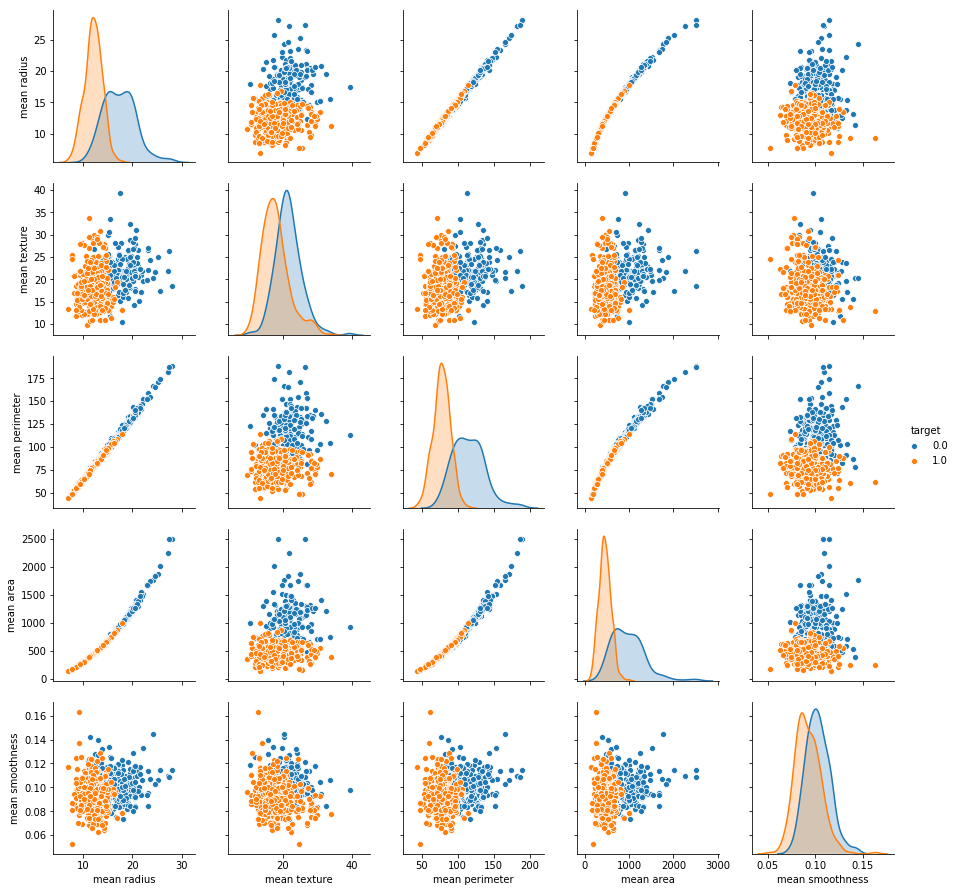

In [26]:
sns.pairplot(df_cancer,hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness'] )

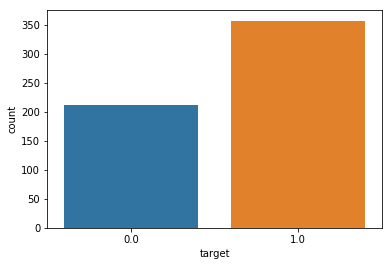

In [28]:
sns.countplot(df_cancer['target'])

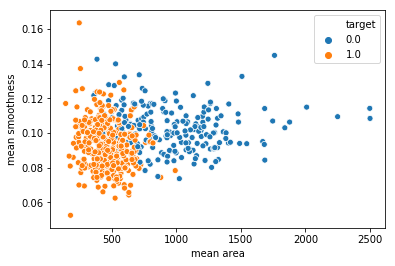

In [30]:
sns.scatterplot(x= 'mean area', y='mean smoothness',hue= 'target',data= df_cancer)

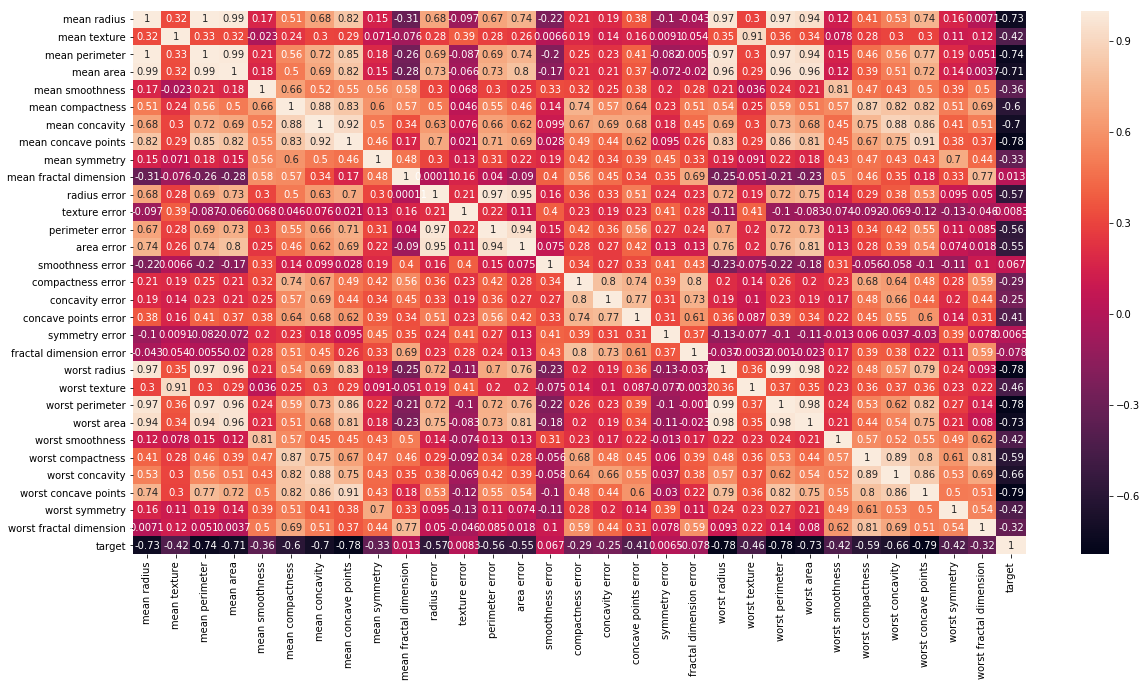

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot= True)

In [41]:
X=df_cancer.drop(['target'], axis=1)

In [42]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [35]:
y=df_cancer['target']

In [36]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=5)

In [44]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
115,11.930,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.020080,0.1688,0.06194,...,13.670,26.15,87.54,583.0,0.15000,0.23990,0.150300,0.072470,0.2438,0.08541
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.059430,0.1861,0.06248,...,19.920,25.27,129.00,1233.0,0.13140,0.22360,0.280200,0.121600,0.2792,0.08158
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.020700,0.1579,0.05594,...,16.410,26.42,104.40,830.5,0.10640,0.14150,0.167300,0.081500,0.2356,0.07603
201,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.074880,0.1506,0.05491,...,20.420,25.84,139.50,1239.0,0.13810,0.34200,0.350800,0.193900,0.2928,0.07867
484,15.730,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.062110,0.1784,0.06259,...,17.010,14.20,112.50,854.3,0.15410,0.29790,0.400400,0.145200,0.2557,0.08181
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.017860,0.1830,0.06105,...,11.990,16.30,76.25,440.8,0.13410,0.08971,0.071160,0.055060,0.2859,0.06772
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.750,22.88,146.40,1600.0,0.14120,0.30890,0.353300,0.166300,0.2510,0.09445
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.500,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
439,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.026520,0.1589,0.05586,...,14.910,19.31,96.53,688.9,0.10340,0.10170,0.062600,0.082160,0.2136,0.06710
506,12.220,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.021660,0.2124,0.06894,...,13.160,24.17,85.13,515.3,0.14020,0.23150,0.353500,0.080880,0.2709,0.08839


In [45]:
y_train

115    1.0
141    0.0
481    1.0
201    0.0
484    1.0
153    1.0
498    0.0
285    1.0
439    1.0
506    1.0
122    0.0
9      0.0
328    0.0
321    0.0
395    1.0
305    1.0
425    1.0
460    0.0
101    1.0
303    1.0
117    0.0
59     1.0
465    1.0
48     1.0
304    1.0
109    1.0
224    1.0
472    1.0
357    1.0
529    1.0
      ... 
539    1.0
110    1.0
5      0.0
144    1.0
103    1.0
210    0.0
446    0.0
41     0.0
362    1.0
377    1.0
254    0.0
146    0.0
86     0.0
542    1.0
431    1.0
65     0.0
205    0.0
44     0.0
27     0.0
80     1.0
437    1.0
113    1.0
204    1.0
519    1.0
411    1.0
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 381, dtype: float64

In [46]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,0.1926,0.06540,...,20.270,36.71,149.30,1269.0,0.16410,0.61100,0.633500,0.20240,0.4027,0.09876
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.028220,0.1551,0.06761,...,13.580,28.68,87.36,553.0,0.14520,0.23380,0.168800,0.08194,0.2268,0.09082
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,0.1856,0.06402,...,15.700,15.98,102.80,745.5,0.13130,0.17880,0.256000,0.12210,0.2889,0.08006
361,13.300,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,0.05696,...,14.200,29.20,92.94,621.2,0.11400,0.16670,0.121200,0.05614,0.2637,0.06658
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,0.1976,0.06328,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.061940,0.03264,0.3059,0.07626
339,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.230800,0.141000,0.1797,0.05506,...,30.670,30.73,202.40,2906.0,0.15150,0.26780,0.481900,0.20890,0.2593,0.07738
286,11.940,20.76,77.87,441.0,0.08605,0.10110,0.065740,0.037910,0.1588,0.06766,...,13.240,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.11550,0.2465,0.09981
354,11.140,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.014710,0.1690,0.06083,...,12.120,15.82,79.62,453.5,0.08864,0.12560,0.120100,0.03922,0.2576,0.07018
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.11080,0.2827,0.09208
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.028000,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.330800,0.08978,0.2048,0.07628


In [47]:
from sklearn.svm import SVC

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
svc_model = SVC()

In [55]:
svc_model.fit(X_train,y_train)

c:\users\mayank\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
y_predict= svc_model.predict(X_test)

In [57]:
y_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [58]:
cn= confusion_matrix(y_test,y_predict)

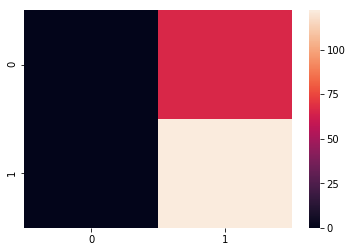

In [59]:
sns.heatmap(cn)

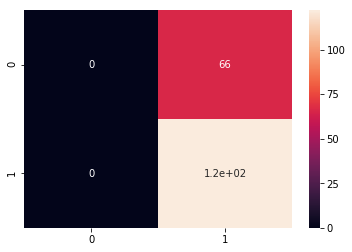

In [61]:
sns.heatmap(cn, annot=True)

In [62]:
# now having something wrong out of this data, so now normalizing it improve the model


# IMPROVEMENT 1

In [63]:
min_train= X_train.min()
range_train =(X_train-min_train).max()
X_train_scaled = (X_train- min_train)/range_train

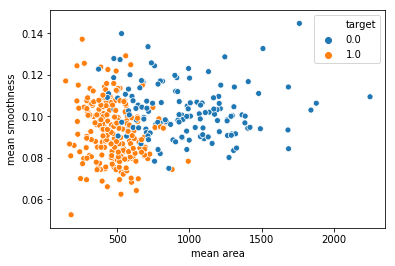

In [64]:
sns.scatterplot(x= X_train['mean area'], y=X_train['mean smoothness'], hue=y_train)

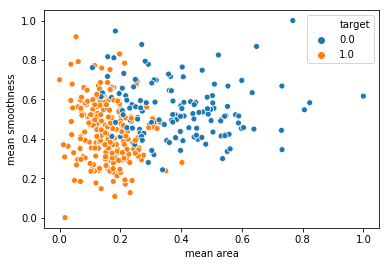

In [65]:
sns.scatterplot(x= X_train_scaled['mean area'], y=X_train_scaled['mean smoothness'], hue=y_train)

In [66]:
min_test= X_test.min()
range_test =(X_test-min_test).max()
X_test_scaled = (X_test- min_test)/range_test

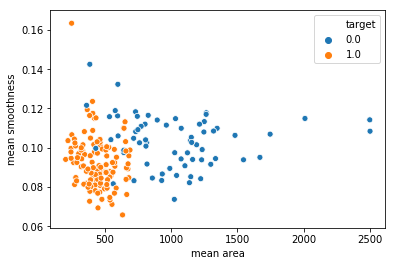

In [68]:
sns.scatterplot(x= X_test['mean area'], y=X_test['mean smoothness'], hue=y_test)

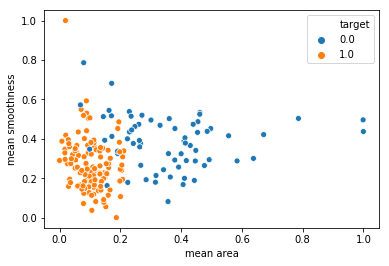

In [69]:
sns.scatterplot(x= X_test_scaled['mean area'], y=X_test_scaled['mean smoothness'], hue=y_test)

In [71]:
svc_model.fit(X_train_scaled,y_train)

c:\users\mayank\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
y_predict= svc_model.predict(X_test_scaledprint)

In [73]:
cn= confusion_matrix(y_test,y_predict)

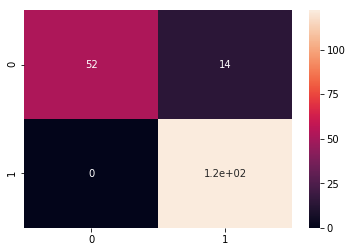

In [74]:
sns.heatmap(cn,annot =True)

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        66
         1.0       0.90      1.00      0.95       122

   micro avg       0.93      0.93      0.93       188
   macro avg       0.95      0.89      0.91       188
weighted avg       0.93      0.93      0.92       188



# IMPROVEMENT 2 

In [94]:
param_grid={'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001] ,'kernel':['rbf']}

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid = GridSearchCV(SVC(), param_grid, refit= True, verbose = 4)

In [97]:
grid.fit(X_train_scaled, y_train)

c:\users\mayank\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.9375, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9212598425196851, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ...... C=0.1, gamma=0.1, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8976377952755905, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [98]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [99]:
grid_predictions= grid.predict(X_test_scaled)

In [100]:
cn=confusion_matrix(y_test,grid_predictions)

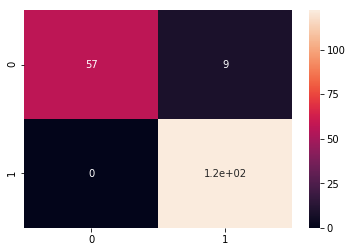

In [101]:
sns.heatmap(cn , annot=True)

In [103]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        66
         1.0       0.90      1.00      0.95       122

   micro avg       0.93      0.93      0.93       188
   macro avg       0.95      0.89      0.91       188
weighted avg       0.93      0.93      0.92       188

